# Lectura de imágenes

In [ ]:
#https://keras.io/api/preprocessing/image/
#https://www.tensorflow.org/tutorials/images/classification#compile_the_model
#https://keras.io/examples/vision/image_classification_from_scratch/

In [1]:
import tensorflow 
from tensorflow import keras as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
directory = "train"

val= tf.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1234,#semilla elegida de forma arbitraria
    validation_split=0.3, #70% conjunto de entrenamiento
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    smart_resize=False,
)

train= tf.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1234,#semilla elegida de forma arbitraria
    validation_split=0.3, #30% conjunto de prueba
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    smart_resize=False,
)

Found 7068 files belonging to 25 classes.
Using 2120 files for validation.
Found 7068 files belonging to 25 classes.
Using 4948 files for training.


In [3]:
#nombres clases
class_names = train.class_names
print(class_names)
print(len(class_names))

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']
25


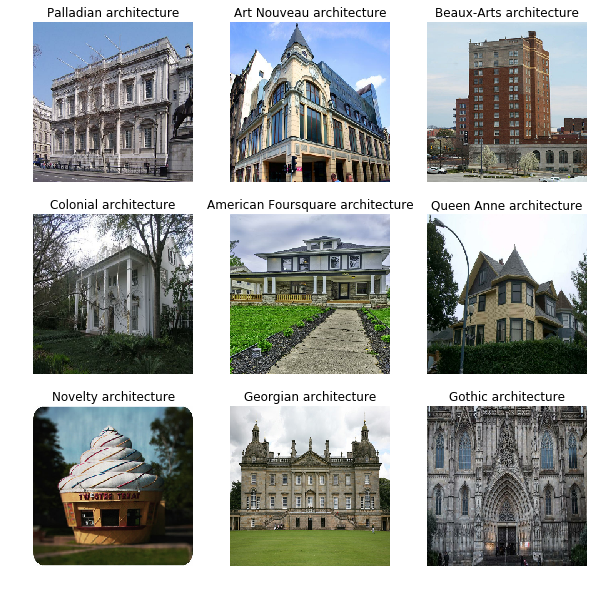

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 131072)           

In [32]:
epochs=6
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/6
155/155 [==============================] - 125s 803ms/step - loss: 3.2897 - accuracy: 0.0950 - val_loss: 3.0465 - val_accuracy: 0.1179
Epoch 2/6
155/155 [==============================] - 126s 815ms/step - loss: 2.7534 - accuracy: 0.2047 - val_loss: 2.8712 - val_accuracy: 0.1901
Epoch 3/6
155/155 [==============================] - 121s 779ms/step - loss: 1.7411 - accuracy: 0.4958 - val_loss: 3.1801 - val_accuracy: 0.2108
Epoch 4/6
155/155 [==============================] - 139s 897ms/step - loss: 0.5951 - accuracy: 0.8440 - val_loss: 4.2102 - val_accuracy: 0.2000
Epoch 5/6
155/155 [==============================] - 124s 798ms/step - loss: 0.1606 - accuracy: 0.9721 - val_loss: 4.5454 - val_accuracy: 0.2024
Epoch 6/6
155/155 [==============================] - 121s 779ms/step - loss: 0.0791 - accuracy: 0.9915 - val_loss: 4.7321 - val_accuracy: 0.2028


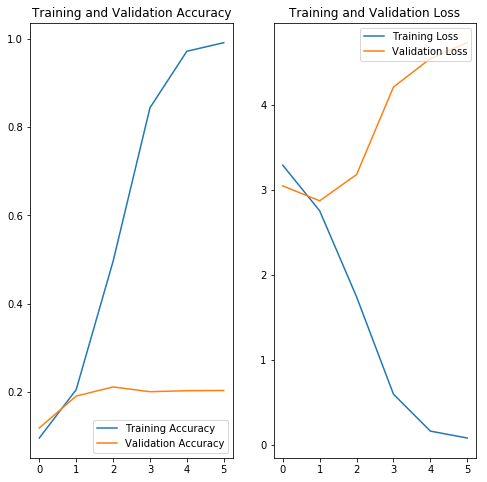

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
img = tf.preprocessing.image.load_img(
    "train/Bauhaus architecture/165_400px-Bad_Nauheim_Synagoge_97.JPG", target_size=(256,256,3)
)
img_array = tf.preprocessing.image.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    class_names[score.tolist().index(max(score))]
)

Bauhaus architecture
